Student Name: Garret Molloy

Student ID: 9021906

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [10]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA



As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [11]:
a_x = 0.05
a_y= 10

In [210]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])


data_mismatch = [[ 0.        ,  2.57954403],
 [ 0.99602858,  1.5891675 ],
 [ 2.00112747,  7.04934137],
 [ 3.04256979, 10.03312726],
 [ 3.99531939, 16.83382039],
 [ 5.10202822, 20.04686856],
 [ 5.93455135, 26.55804204],
 [ 7.04142915, 25.50506341],
 [ 8.1638985 , 36.82785476],
 [ 9.13959776, 40.0216595 ],
 [ 9.90507378, 42.29831748],
 [11.21936106, 45.83983932],
 [11.98328563, 44.00701208],
 [12.95721169, 53.10886973],
 [14.28910774, 60.66606368],
 [14.98275733, 63.65309928],
 [15.80839385, 67.05027827],
 [17.04139441, 63.140417  ],
 [18.19773422, 70.98823542],
 [19.30860273, 77.68153201]]

data_match = [[ 0.,         -4.22830278],
 [ 1.01505178,  2.22688934],
 [ 1.99873554, 10.81453781],
 [ 3.02864052, 13.35797879],
 [ 3.9869405 , 12.57558693],
 [ 4.90162102, 21.03062467],
 [ 5.90072729, 20.6964779 ],
 [ 7.07184393, 29.05295731],
 [ 8.07977457, 35.89149058],
 [ 8.98537757, 40.30033969],
 [10.10816146, 39.41500296],
 [11.19544781, 46.75547936],
 [12.04701742, 49.17473117],
 [13.0677893 , 49.7899254 ],
 [14.18069188, 56.78281782],
 [15.33737312, 63.70410606],
 [15.85364707, 61.80037181],
 [17.14309877, 63.98445754],
 [17.99313303, 69.06361475],
 [18.88932212, 73.25528261]]

# To see a mismatched result between scikit and My PCA
# data = data_mismatch

# To see a perfect matched result for scikit and My PCA
# dta = data_match


print(data)


[[ 0.         -2.0194807 ]
 [ 0.99659202  8.708197  ]
 [ 2.00842767  7.88956363]
 [ 3.06826015  8.46955062]
 [ 3.9044002  19.57792152]
 [ 5.09345385 22.77674623]
 [ 5.93625636 25.01725005]
 [ 7.00992238 29.44845262]
 [ 8.10779196 33.62710937]
 [ 9.19028529 31.94856812]
 [10.01404089 36.81408785]
 [11.00761003 39.77820259]
 [12.03996216 48.41364219]
 [12.82786491 49.35345531]
 [13.78370098 54.97968451]
 [14.66587216 55.55528173]
 [15.90298169 64.88517208]
 [16.73488828 72.51846605]
 [17.93364995 70.94800758]
 [19.40493055 77.10668531]]


The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [20]:
data.shape

(20, 2)

## My PCA Class

In [211]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.decomposition import PCA

# based on tutorial : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

class My_PCA:
    def __init__(self, list, n_components = 2):
        self.array = array(list)
        self.n_components = n_components
        
    def fit(self, n_components = 0):
        # set n_components if passed in
        if(n_components != 0):
            self.n_components = n_components
        # calculate the mean of each column in our array
        self.mean = mean(self.array.T, axis=1)
        # center columns by subtracting column means
        self.centered = self.array - self.mean
        # calculate covariance matrix of centered matrix
        self.covariance = cov(self.centered.T)
        # eigen decomposition of covariance matrix
        self.eigenvalues, self.eigenvectors = eig(self.covariance)
        # We should sort the eigen vectors by their eigen value
        eigen_value_order = self.eigenvalues.argsort()[::-1]
        self.eigenvalues = self.eigenvalues[eigen_value_order]
        self.eigenvectors = self.eigenvectors[:, eigen_value_order]

        # n_components will filter the eigen vectors - Thanks Abhijit Sinha
        self.eigenvalues = self.eigenvalues[:self.n_components]
        self.eigenvectors = self.eigenvectors[:, :self.n_components]  
        
    def calculate_pca(self, n_components = 0):
        # set n_components if passed in
        if(n_components != 0):
            self.n_components = n_components
        self.fit(self.n_components)

        transposed_matrix = self.eigenvectors.T.dot(self.centered.T)
        return (transposed_matrix.T)


# Array Defined above variable=data

# PCA Calculation using my class My_PCA
my_pca = My_PCA(data)
my_pca_calculation = my_pca.calculate_pca()

# PCA calculation using sklearn PCA
# create the PCA instance
sklearn_array = array(data)
sklearn_pca = PCA(2)
sklearn_pca.fit(sklearn_array)
sklearn_PCA_calculation = sklearn_pca.transform(sklearn_array)

if(np.allclose(my_pca.eigenvectors, sklearn_pca.components_)):
    print ("MATCH!\n")
else:
    print("POLARITY MISMATCH!!\n")
           
print("My_PCA versus SKLEARN Comparison:")
# access values and vectors
print("=== My eigen vectors")
print(my_pca.eigenvectors)
print("=== SKLEARN eigen vectors")
print(sklearn_pca.components_)
print("=== My eigen values")
print(my_pca.eigenvalues)
print("=== SKLEARN eigen values")
print(sklearn_pca.explained_variance_)
print("My PCA Calculation:")
print(my_pca_calculation)
print("PCA:")
print(sklearn_PCA_calculation)


MATCH!

My_PCA versus SKLEARN Comparison:
=== My eigen vectors
[[-0.24177287 -0.97033287]
 [-0.97033287  0.24177287]]
=== SKLEARN eigen vectors
[[-0.24177287 -0.97033287]
 [-0.97033287  0.24177287]]
=== My eigen values
[5.85431170e+02 5.13400478e-01]
=== SKLEARN eigen values
[5.85431170e+02 5.13400478e-01]
My PCA Calculation:
[[ 4.09206612e+01 -4.24556308e-01]
 [ 3.02702940e+01  1.20207908e+00]
 [ 3.08200065e+01  2.23383465e-02]
 [ 3.00009873e+01 -8.65826834e-01]
 [ 1.90200139e+01  1.00854165e+00]
 [ 1.56286082e+01  6.28152829e-01]
 [ 1.32508069e+01  3.52046883e-01]
 [ 8.69148208e+00  3.81577987e-01]
 [ 4.37135901e+00  3.26564867e-01]
 [ 5.73838524e+00 -1.12963972e+00]
 [ 8.18049761e-01 -7.52606217e-01]
 [-2.29834626e+00 -1.00005650e+00]
 [-1.09271919e+01  8.60332713e-02]
 [-1.20296170e+01 -4.51273358e-01]
 [-1.77200273e+01 -1.84829611e-02]
 [-1.84918333e+01 -7.35318865e-01]
 [-2.78440321e+01  3.19987421e-01]
 [-3.54520006e+01  1.35828447e+00]
 [-3.42179612e+01 -1.84607634e-01]
 [-4.05

When creating the random data - some data generation provdes an exact match with ScikitLearns's output.
The eigen vectors are a match and the plotting is exact.
Run the random data generator again and sometimes the eigenvectors will have different polarities.
In these cases teh graph will not overlap directly.

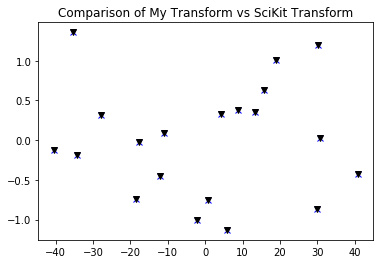

In [212]:
plt.title('Comparison of My Transform vs SciKit Transform')
plt.plot(my_pca_calculation[:,0], my_pca_calculation[:,1],'xb')
plt.plot(sklearn_PCA_calculation[:,0], sklearn_PCA_calculation[:,1],'kv')
plt.show()
 # thanks to Martin Power for plotting tip

In [ ]:
When there is no polarity differntial between the SciKit and My eigenvectors there is an exact match.
When they do not match, this is due to the polarity being different.

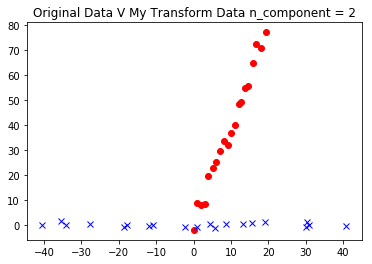

In [213]:
plt.title('Original Data V My Transform Data n_component = 2')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(my_pca_calculation[:,0], my_pca_calculation[:,1],'xb')

sklearn_pca1 = PCA(1)
sklearn_pca1.fit(sklearn_array)
sklearn_PCA_calculation1 = sklearn_pca1.transform(sklearn_array)


plt.show()

## n_component = 1

My PCA Calculation n_component = 1:
=== eigen vectors
[[-0.24177287]
 [-0.97033287]]
=== eigen values
[585.43116965]
PCA:
[[ 4.09206612e+01 -4.24556308e-01]
 [ 3.02702940e+01  1.20207908e+00]
 [ 3.08200065e+01  2.23383465e-02]
 [ 3.00009873e+01 -8.65826834e-01]
 [ 1.90200139e+01  1.00854165e+00]
 [ 1.56286082e+01  6.28152829e-01]
 [ 1.32508069e+01  3.52046883e-01]
 [ 8.69148208e+00  3.81577987e-01]
 [ 4.37135901e+00  3.26564867e-01]
 [ 5.73838524e+00 -1.12963972e+00]
 [ 8.18049761e-01 -7.52606217e-01]
 [-2.29834626e+00 -1.00005650e+00]
 [-1.09271919e+01  8.60332713e-02]
 [-1.20296170e+01 -4.51273358e-01]
 [-1.77200273e+01 -1.84829611e-02]
 [-1.84918333e+01 -7.35318865e-01]
 [-2.78440321e+01  3.19987421e-01]
 [-3.54520006e+01  1.35828447e+00]
 [-3.42179612e+01 -1.84607634e-01]
 [-4.05496443e+01 -1.23238402e-01]]


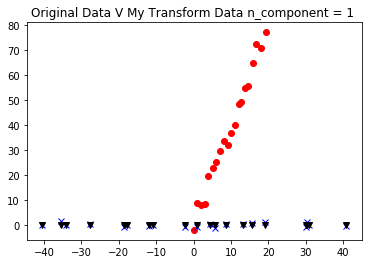

In [214]:
# Remember you can do a n_component = 1 just by secifyinhg this in the calculate function

print("My PCA Calculation n_component = 1:")
my_pca_calculation_n1 = my_pca.calculate_pca(1)
print("=== eigen vectors")
print(my_pca.eigenvectors)
print("=== eigen values")
print(my_pca.eigenvalues)
print("PCA:")
print(my_pca_calculation)

plt.title('Original Data V My Transform Data n_component = 1 ')
plt.plot(data[:,0], data[:,1], 'or')
plt.plot(my_pca_calculation[:,0], my_pca_calculation[:,1],'xb')
plt.plot(my_pca_calculation_n1[:,0], np.zeros_like(my_pca_calculation_n1),'kv')
plt.show()

We have reduced teh 2 D matrix to a 1 D array.
We can suggest that the red diagonal lien and the elements along it have been rotated onto the horizontal axis.
As the elements were close to the line, the transform does not lose the variance of the original data (no data loss) from the missing dimension.


Compare the 2 D transform to the 1D transform and you see it is just mapped to a line.


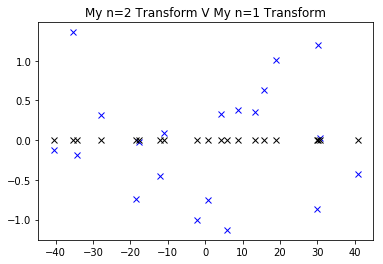

In [215]:
plt.title('My n=2 Transform V My n=1 Transform')
plt.plot(my_pca_calculation[:,0], my_pca_calculation[:,1],'xb')
plt.plot(my_pca_calculation_n1[:,0], np.zeros_like(my_pca_calculation_n1),'xk')
plt.show()

Result: Mapped to the x plane. Still no loss of data in our case.

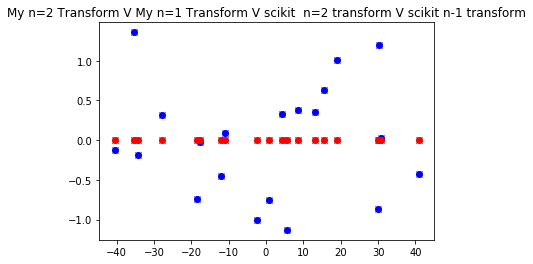

In [216]:
plt.title('My n=2 Transform V My n=1 Transform V scikit  n=2 transform V scikit n-1 transform')
plt.plot(my_pca_calculation[:,0], my_pca_calculation[:,1],'xb')
plt.plot(my_pca_calculation_n1[:,0], np.zeros_like(my_pca_calculation_n1),'xk')

# Calculate n_component = 1 with scikit
sklearn_pca1 = PCA(1)
sklearn_pca1.fit(sklearn_array)
sklearn_PCA_calculation1 = sklearn_pca1.transform(sklearn_array)
plt.plot(sklearn_PCA_calculation[:,0], sklearn_PCA_calculation[:,1],'ob')
plt.plot(sklearn_PCA_calculation1[:,0], np.zeros_like(sklearn_PCA_calculation1),'or')

plt.show()

We can see - if the polarity is different The 1D plot is differnt - they do not converge.

